In [1]:
# Preamble

from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [2]:
import sys
sys.path.append('../../astro_codes/')

In [11]:
samples = Table.read('matched_fits/samples.fits')
chang_out_data = Table.read('matched_fits/chang_output_matched.fits')
#nsa_data = Table.read('matched_fits/nsa_matched.fits')
#masks = Table.read('matched_fits/bad_flux_mask.fits')

In [4]:
gz_data = Table.read('matched_fits/gz_data.fits')

In [9]:
unbarred = gz_data['t03_bar_a06_bar_debiased_rh'] < 0.5
samples['unbarred'] = unbarred
samples['spiral_all'] = (samples['unbarred']) & (samples['axial_ok']) & (samples['in_spiral'])
samples.write('matched_fits/samples.fits',overwrite=True)

In [12]:
in_ml_spirals = ((samples['in_mass_limit']) & (samples['spiral_all']) &
                 (chang_out_data['lmass50_all'] > -999))

In [13]:
colors = ['orange','r','m','g','b']

medians = []
lower_percentiles = []
upper_percentiles = []

for m in range(5):
    in_m_sample = (in_ml_spirals) & (samples['m'] == m)
    masses_m = chang_out_data['lmass50_all'][in_m_sample]
    medians.append(np.median(masses_m))
    lower_percentiles.append(np.percentile(masses_m,16))
    upper_percentiles.append(np.percentile(masses_m,84))

medians, lower_percentiles, upper_percentiles = [np.array(u) for u in [medians,lower_percentiles,upper_percentiles]]

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


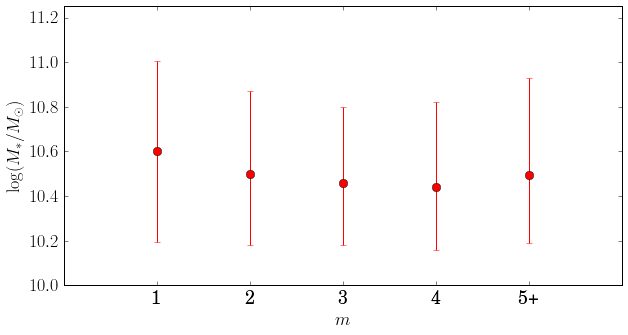

In [14]:
m_values = [1,2,3,4,5]
fig = plt.figure(figsize=(10,5))

_ = plt.errorbar(m_values,medians,yerr=[medians-lower_percentiles,upper_percentiles-medians],fmt='o',
                 markersize=8,linewidth=1,color='r')
plt.xlim(0,6)
plt.ylim(10,11.25)
_ = plt.xticks([1,2,3,4,5],['1','2','3','4','5+'])
plt.xlabel('$m$')
plt.ylabel('$\log(M_*/M_{\odot})$')
#plt.savefig('output_figures/mass_plot.pdf')

In [68]:
masses_m_list = []

for m in range(5):
    in_m_sample = (in_ml_spirals) & (samples['m'] == m)
    masses_m = chang_out_data['lmass50_all'][in_m_sample]
    masses_m_list.append(masses_m)
    print(np.median(masses_m))
    print(np.percentile(masses_m,16),np.percentile(masses_m,84))

10.6000003815
10.1951996994 11.0048001099
10.5
10.1800003052 10.8699998856
10.4600000381
10.1812002182 10.7988001633
10.4399995804
10.1599998474 10.8199996948
10.4949998856
10.1899995804 10.9300003052


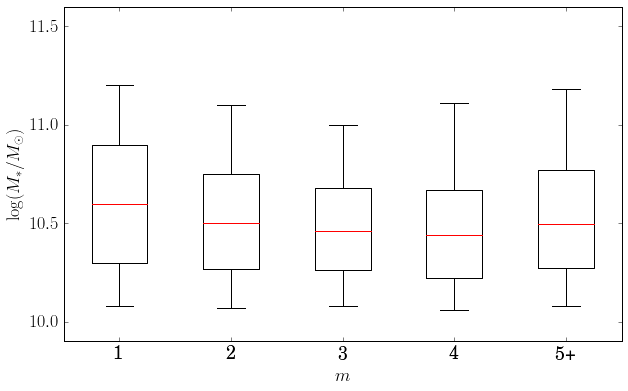

In [76]:
plt.figure(figsize=(10,6))

mlabels = ['1','2','3','4','5+']
bp = plt.boxplot(masses_m_list,sym='k+',showfliers=False,labels=mlabels,whis=[5,95])
lw = 1
plt.setp(bp['caps'], color='black',linewidth=lw)
plt.setp(bp['whiskers'], color='black',linestyle='solid',linewidth=lw)
plt.setp(bp['medians'],color='r',linewidth=lw)
plt.setp(bp['boxes'],color='k',linewidth=lw)
plt.ylim(9.9,11.6)
plt.yticks([10,10.5,11,11.5])
plt.xlabel('$m$')
plt.ylabel('$\log(M_*/M_\odot)$')

plt.savefig('output_figures/mass_plots.pdf')

In [65]:
np.percentile(chang_out_data['lmass50_all'][in_ml_spirals],16),np.percentile(chang_out_data['lmass50_all'][in_ml_spirals],84)

(10.180000305175781, 10.869999885559082)

### How many of our gals. are SF?

In [46]:
samples.colnames

['in_nsa',
 'in_wise',
 'in_redshift',
 'in_lum_limit',
 'in_mass_limit',
 'in_vmax_limit',
 'in_spiral',
 'm',
 'axial_ok',
 'mass_weighting',
 'star_forming']

In [47]:
in_sample = samples['in_mass_limit']
in_spiral = (samples['in_spiral']) & (samples['axial_ok'])

m_total = []
m_sf = []

for m in range(5):
    in_m = samples['m'] == m
    in_m_sample = (in_sample) & (in_spiral) & (in_m)
    m_total.append(np.sum(in_m_sample))
    m_sf.append(np.sum(in_m_sample*samples['star_forming']))

m_total = np.array(m_total)
m_sf = np.array(m_sf)

In [48]:
print(np.sum(m_sf)/np.sum(m_total))
print(m_sf/m_total)

0.683272899259
[ 0.62745098  0.62586783  0.80301602  0.80498866  0.76470588]


Optimization terminated successfully.
         Current function value: -307.393401
         Iterations: 15
         Function evaluations: 44


/home/ppxrh/anaconda3/lib/python3.4/site-packages/astroML/density_estimation/histtools.py:103: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  v25 = dsorted[n / 4 - 1]
/home/ppxrh/anaconda3/lib/python3.4/site-packages/astroML/density_estimation/histtools.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  v75 = dsorted[(3 * n) / 4 - 1]


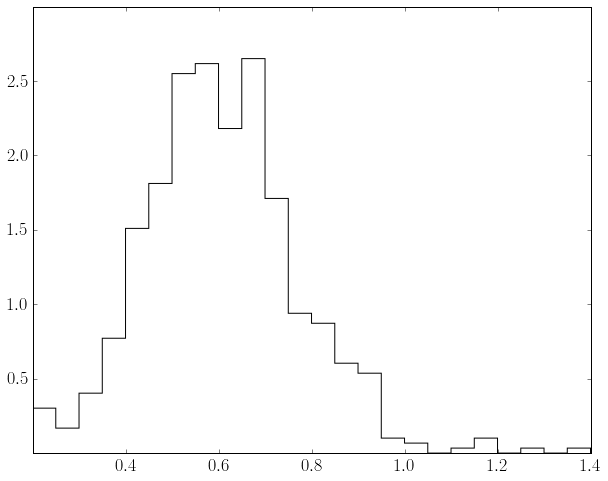

In [97]:
bins = histogram(fuv_nuv[(samples['m'] == 4) & (spiral_sample)])

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


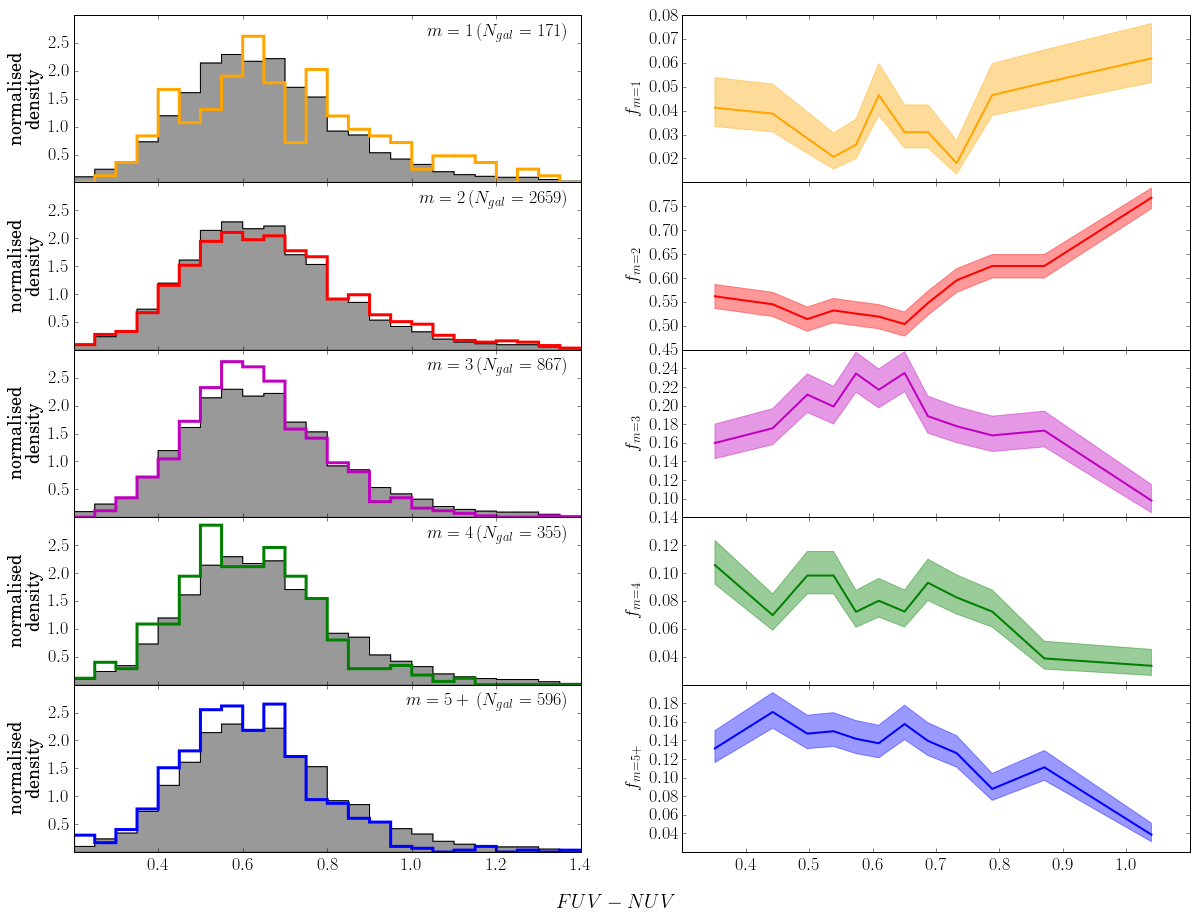

In [129]:
### plot the FUV-NUV colours (as asked by CJL)
from histograms import histogram
from bin_statistics import assign_bins, stats_functions

fig, axarr = plt.subplots(5,2,figsize=(20,15),sharex='col')
fig.subplots_adjust(hspace=0)

in_sample = samples['in_mass_limit']

axarr_left = axarr[:,0]
axarr_right = axarr[:,1]

all_morph_sample = (samples['in_mass_limit']) & (has_fuv_nuv)
spiral_sample = (in_spiral) & (all_morph_sample) & (has_fuv_nuv)
reference_x = fuv_nuv[spiral_sample]
x_bins = np.ones(len(nsa_data))*(-999)
x_bins[spiral_sample] = assign_bins(fuv_nuv[spiral_sample],N_bins=12)
xbin_centres = stats_functions().median_and_percentile(fuv_nuv,x_bins)
mlabels = ['1','2','3','4','5+']

for m in range(5):
    ax = axarr_left[m]
    plt.sca(ax)
    in_m = samples['m'] == m
    x = fuv_nuv[(spiral_sample) & (in_m)]
    _ = histogram(reference_x,fill=True,bins=bins,x_range=(0,1.2))
    x_line_properties = {'color':colors[m],
                         'linewidth':3}
    _ = histogram(x,fill=False,bins=bins,line_properties=x_line_properties)
    plt.ylabel('normalised \n density')
    plt.ylim(0,3)
    plt.text(0.975,0.95,'$m={} \, (N_{{gal}}={})$'.format(mlabels[m],len(x)),
             ha='right',va='top',transform=ax.transAxes)
    plt.sca(axarr_right[m])
    fracs = stats_functions().fraction_with_feature(in_m,x_bins)
    _ = plt.plot(xbin_centres['median'],fracs['f'],color=colors[m],linewidth=2)
    _ = plt.fill_between(xbin_centres['median'],fracs['f-0.683'],fracs['f+0.683'],
                         color=colors[m],alpha=0.4)
    plt.ylabel('$f_{{m={}}}$'.format(mlabels[m]))  
fig.text(0.5, 0.075, '$FUV-NUV$', ha='center',fontsize=20)
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
fig.savefig('output_figures/fuv_nuv_plots.pdf')